In [1]:
import sys
import numpy as np
import cv2

In [2]:
#비디오 열기

cap = cv2.VideoCapture("/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/camshift.avi")

if not cap.isOpened():
    print("video open failed")
    sys.exit()
    
#초기 사각형 영역 : (w, y, w, h)
x, y, w, h = 135, 220, 100, 100
rc = (x, y, w, h)

ret, frame = cap.read()

if not ret:
    print('frame read failed')
    sys.exit()

#관심영역 표기
roi = frame[y:y+h, x:x+w]
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# HS 히스토그램 계산
channels = [0, 1]
ranges = [0, 180, 0, 256]
hist = cv2.calcHist([roi_hsv], channels, None, [90, 128], ranges)

# Mean Shift 알고리즘 종료 기준 10번 반복할 동안 평균 1픽셀의 움직임이 없으면 종료
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
        
    # HS 히스토그램에 대한 역투영
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    backproj = cv2.calcBackProject([frame_hsv], channels, hist, ranges, 1)
    
    #mean Shift
    _, rc = cv2.meanShift(backproj, rc, term_crit)
    
    # 추적 결과 화면 출력
    cv2.rectangle(frame, rc, (0,0,255), 2)
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(60)==27:
        break
        
cap.release()
cv2.destroyAllWindows()

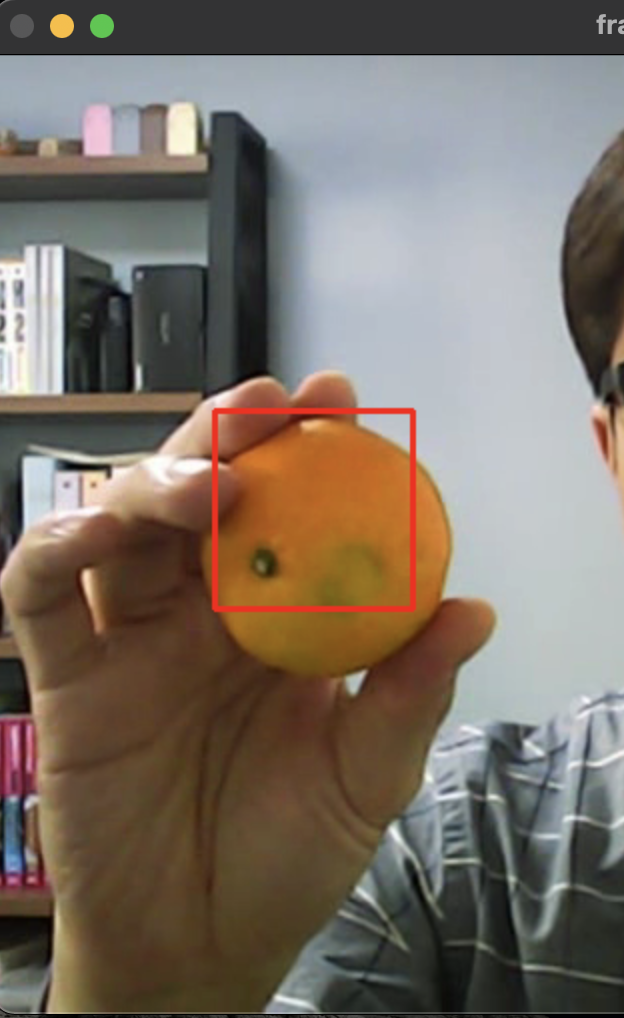